In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE

In [73]:
parkinsons=pd.read_csv('/content/parkinsons - parkinsons.csv')
parkinsons.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [74]:
parkinsons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

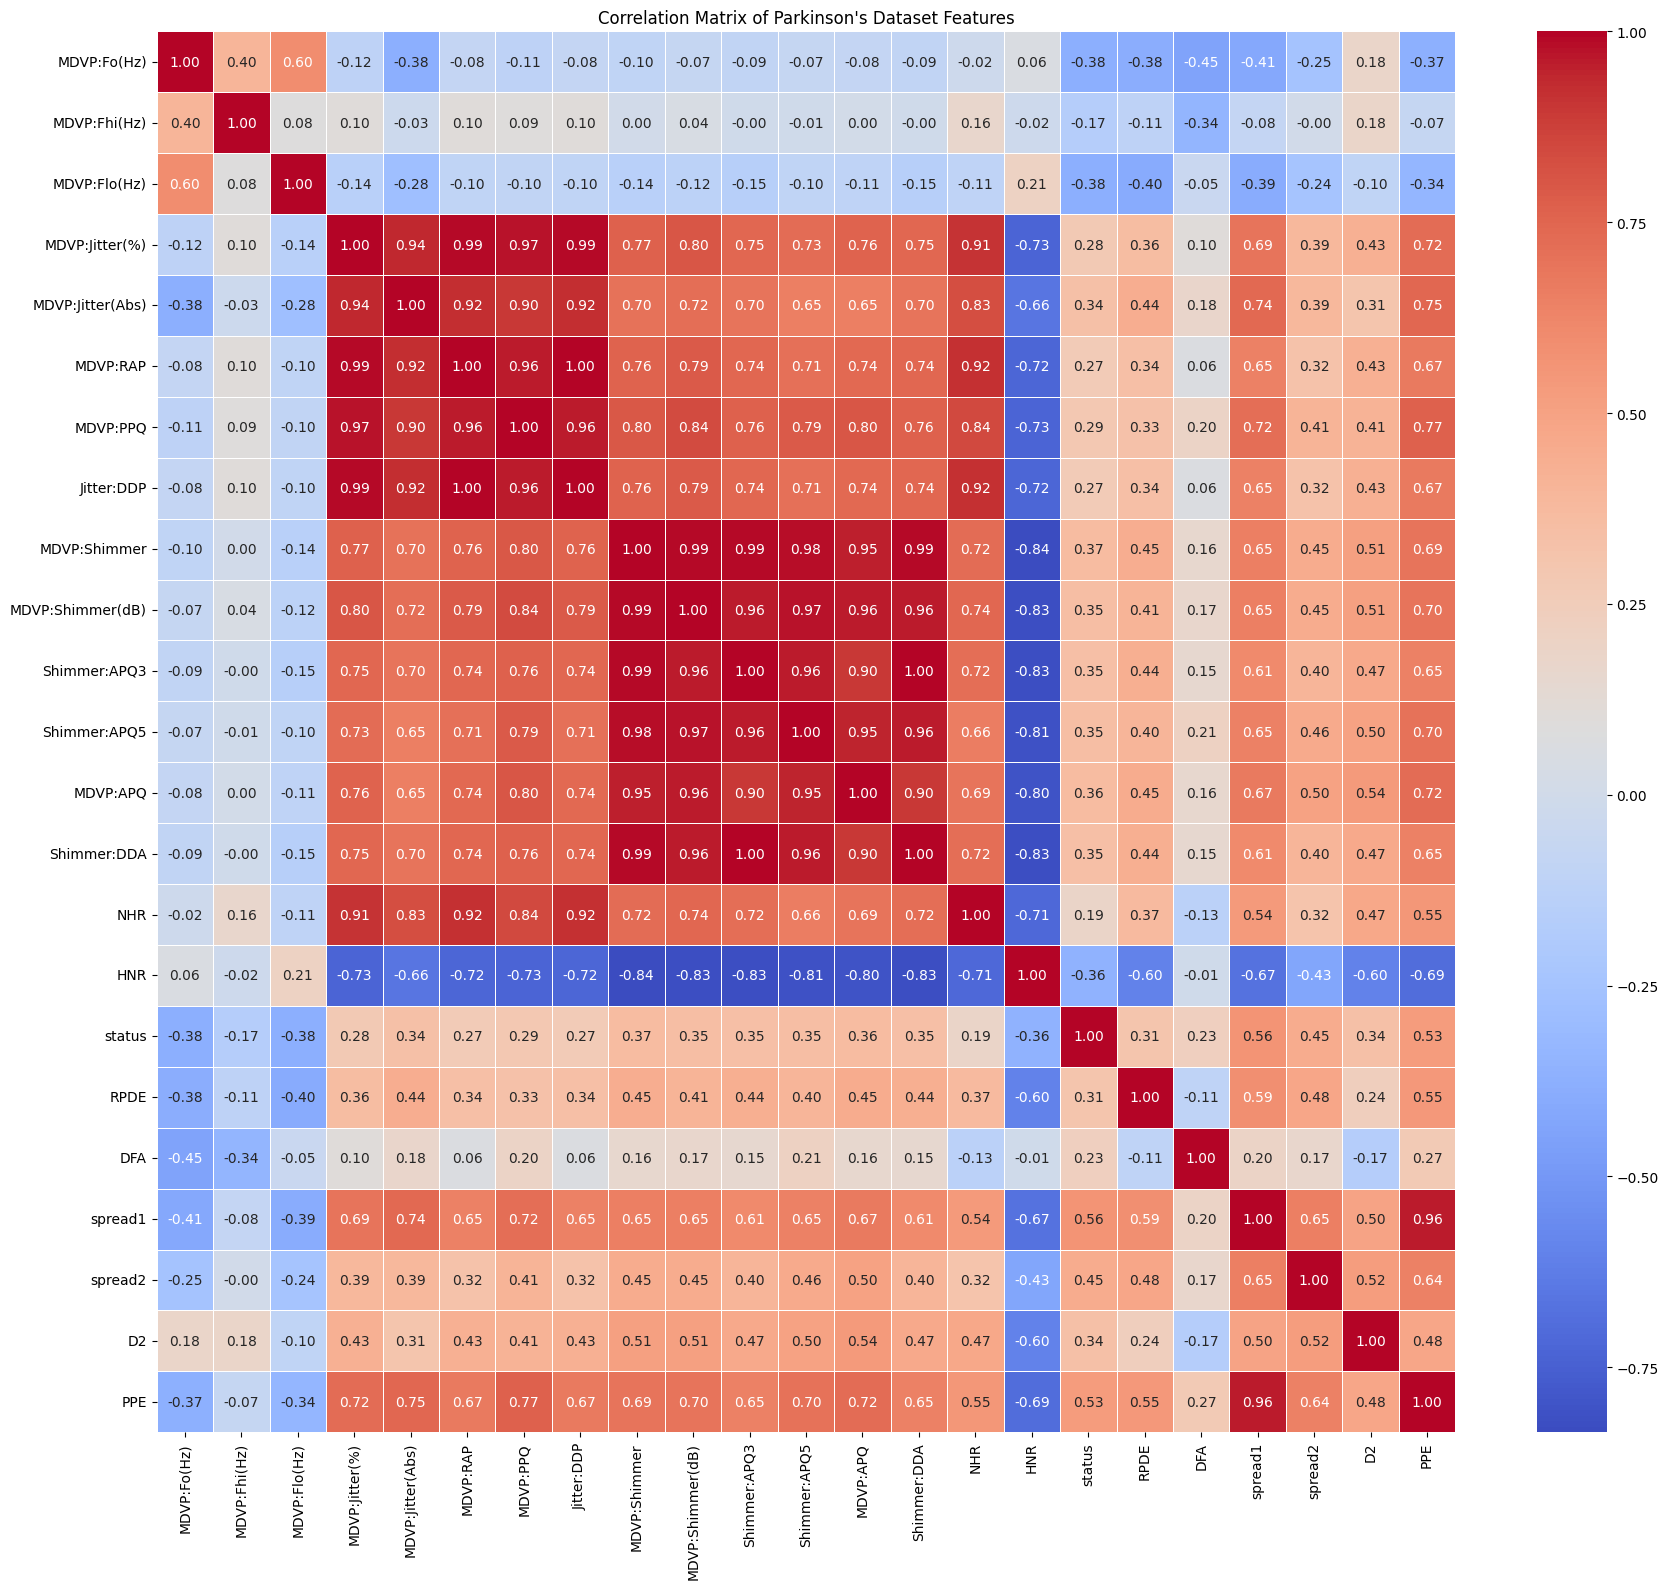

In [77]:
parkinsons_eda = parkinsons.drop('name', axis=1)

correlation_matrix = parkinsons_eda.corr()

plt.figure(figsize=(18, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Parkinson\'s Dataset Features')
plt.tight_layout()

In [80]:
x = parkinsons.drop(['name', 'status'], axis=1)
y = parkinsons['status']

In [81]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)


In [83]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [84]:
smote = SMOTE(random_state=42)
x_train_balanced, y_train_balanced = smote.fit_resample(x_train_scaled, y_train)

In [86]:
print("--- Class Distribution Before SMOTE (Training Set) ---")
print(y_train.value_counts().to_markdown(numalign="left", stralign="left"))

--- Class Distribution Before SMOTE (Training Set) ---
| status   | count   |
|:---------|:--------|
| 1        | 118     |
| 0        | 38      |


In [87]:
print("\n--- Class Distribution AFTER SMOTE (Training Set) ---")
print(y_train_balanced.value_counts().to_markdown(numalign="left", stralign="left"))


--- Class Distribution AFTER SMOTE (Training Set) ---
| status   | count   |
|:---------|:--------|
| 0        | 118     |
| 1        | 118     |


In [88]:
model = LogisticRegression(random_state=42)
model.fit(x_train_balanced, y_train_balanced)

LogisticRegression(random_state=42)

In [96]:
print("--- Class Distribution in Training Set ---")
print(y_train.value_counts().to_markdown(numalign="left", stralign="left"))

--- Class Distribution in Training Set ---
| status   | count   |
|:---------|:--------|
| 1        | 118     |
| 0        | 38      |


In [90]:
y_pred = model.predict(x_test_scaled)

In [95]:
print("\nAccuracy Score:")
print(f"{accuracy_score(y_test, y_pred):.4f}")


Accuracy Score:
0.7692


In [97]:
cm = pd.DataFrame(confusion_matrix(y_test, y_pred),
                  index=['Actual Healthy (0)', 'Actual PD (1)'],
                  columns=['Predicted Healthy (0)', 'Predicted PD (1)'])
print(cm.to_markdown(numalign="left", stralign="left"))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


|                    | Predicted Healthy (0)   | Predicted PD (1)   |
|:-------------------|:------------------------|:-------------------|
| Actual Healthy (0) | 9                       | 1                  |
| Actual PD (1)      | 8                       | 21                 |

Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.90      0.67        10
           1       0.95      0.72      0.82        29

    accuracy                           0.77        39
   macro avg       0.74      0.81      0.75        39
weighted avg       0.85      0.77      0.78        39



In [98]:
parkinsons_pickle = 'parkinsons.pkl'
parkinsons.to_pickle(parkinsons_pickle)